# IMDB reviews - RNN

In [7]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [9]:
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [10]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, standardize='lower_and_strip_punctuation')
encoder.adapt(train_dataset.map(lambda text, label: text))

2025-01-17 00:22:48.172369: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
import numpy as np
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [12]:
text_model_input = tf.keras.layers.Input(dtype=tf.string, shape=())
text_model_catprocess2 = encoder(text_model_input)
embedding = tf.keras.layers.Embedding(VOCAB_SIZE, 64, mask_zero=True)(text_model_catprocess2)
lstm = tf.keras.layers.LSTM(128)(embedding)
d1 = tf.keras.layers.Dense(128, activation='relu')(lstm)
d2 = tf.keras.layers.Dense(64, activation='relu')(d1)
d3 = tf.keras.layers.Dense(32, activation='relu')(d2)
output_layer = tf.keras.layers.Dense(2, activation="softmax")(d3)
model = tf.keras.Model(text_model_input, output_layer)
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, None)      │          0 │ input_layer_1[0]… │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 64)  │     64,000 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, None)      │          0 │ text_vectorizati… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 128)       │     98,816 │ embedding_1[0][0… │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     16,512 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 2)         │         66 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 189,730 (741.13 KB)

 Trainable params: 189,730 (741.13 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 298s 759ms/step - accuracy: 0.5561 - loss: 0.6697 - val_accuracy: 0.7350 - val_loss: 0.5343
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 308s 788ms/step - accuracy: 0.7626 - loss: 0.5113 - val_accuracy: 0.7896 - val_loss: 0.4775
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 308s 789ms/step - accuracy: 0.8047 - loss: 0.4489 - val_accuracy: 0.8446 - val_loss: 0.3626
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 308s 788ms/step - accuracy: 0.8270 - loss: 0.4026 - val_accuracy: 0.7929 - val_loss: 0.4303
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 784ms/step - accuracy: 0.8382 - loss: 0.3805 - val_accuracy: 0.8378 - val_loss: 0.3849
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 306s 783ms/step - accuracy: 0.8524 - loss: 0.3462 - val_accuracy: 0.8457 - val_loss: 0.3604
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 307s 785ms/step - accuracy: 0.8686 - loss: 0.3186 - val_accuracy: 0.8659 - val_loss: 0.3239
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 310s 793ms/step - accuracy: 0.8703 -

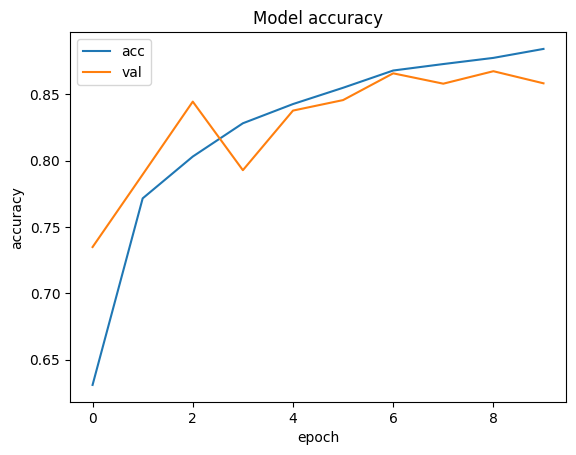

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val'], loc='upper left')
plt.show()